In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,Lasso
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

<Figure size 10000x10000 with 0 Axes>

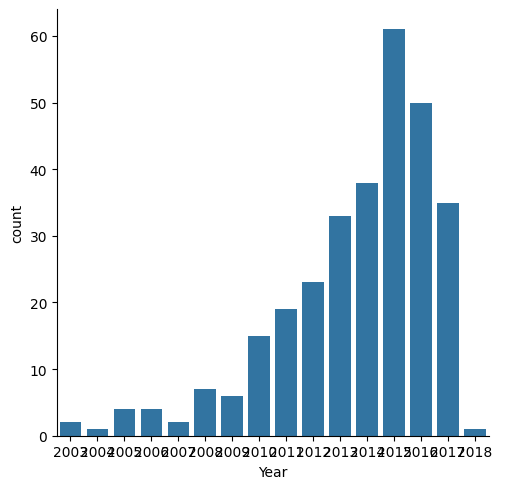

In [6]:
plot = plt.figure(figsize=(100,100))
sns.catplot(x='Year', data=car_data, kind='count')

In [7]:
car_data['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64

In [8]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
car_data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [10]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [12]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4560\2144231635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,0,0
4,swift,2014,4.60,6.87,42450,1,Dealer,0,0


In [17]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,0,0


In [21]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [22]:
X = car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [23]:
y = car_data['Selling_Price']
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

model Training

Linear regression

In [30]:
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_lin = lin_reg.predict(X_train)

In [34]:
#error score
import sklearn.metrics

In [35]:
error_score = sklearn.metrics.r2_score(y_pred_lin, y_train)

In [36]:
error_score

0.8635655509198954

Text(0, 0.5, 'predicted')

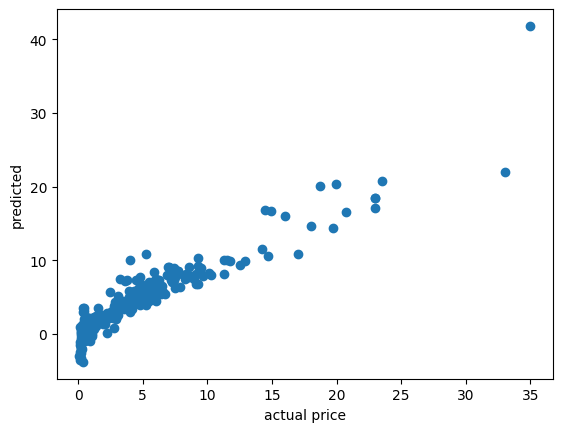

In [37]:
#visualise
plt.scatter(y_train, y_pred_lin)
plt.xlabel("actual price")
plt.ylabel("predicted")

In [38]:
y_pred_test = lin_reg.predict(X_test)

In [39]:
error_score_test = sklearn.metrics.r2_score(y_pred_test, y_test)

In [40]:
error_score_test

0.8062199941176169

Text(0, 0.5, 'predicted')

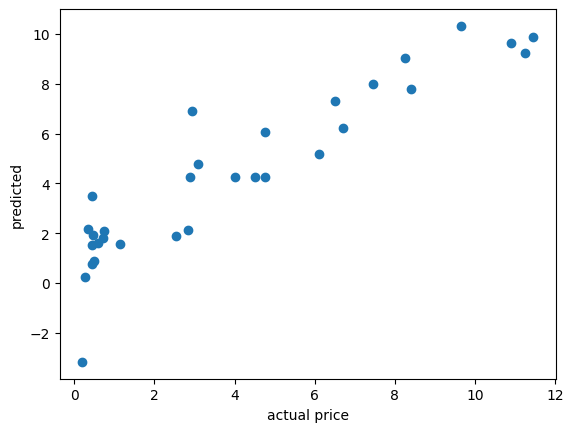

In [41]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("actual price")
plt.ylabel("predicted")

Lasso regression

In [42]:
model_lasso = Lasso()

In [43]:
model_lasso.fit(X_train, y_train)

Lasso()

In [44]:
y_pred_lasso = model_lasso.predict(X_train)

In [45]:
error_score_lasso = sklearn.metrics.r2_score(y_train, y_pred_lasso)

In [46]:
error_score_lasso

0.8427856123435794

Text(0, 0.5, 'predicted')

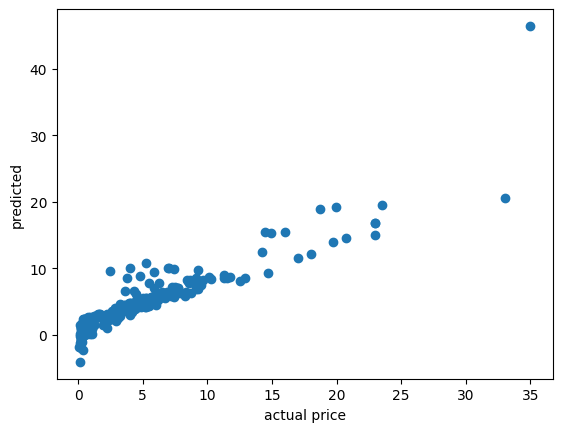

In [47]:
plt.scatter(y_train, y_pred_lasso)
plt.xlabel("actual price")
plt.ylabel("predicted")

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor()

In [53]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred_Xg = model.predict(X_train)

In [56]:
accuracy_score = sklearn.metrics.r2_score(y_train, y_pred_Xg)

In [57]:
accuracy_score

0.9999896680984235

Text(0, 0.5, 'predicted')

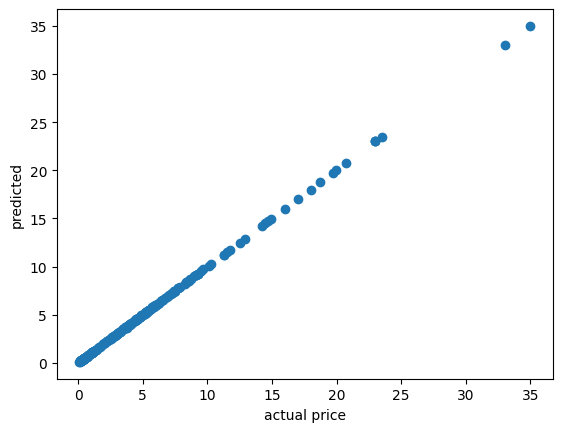

In [59]:
plt.scatter(y_train, y_pred_Xg)
plt.xlabel("actual price")
plt.ylabel("predicted")

In [60]:
y_pred_xg_test = model.predict(X_test)

In [61]:
error_score_test = sklearn.metrics.r2_score(y_pred_xg_test, y_test)

In [62]:
error_score_test

0.9776953091835645

Text(0, 0.5, 'predicted')

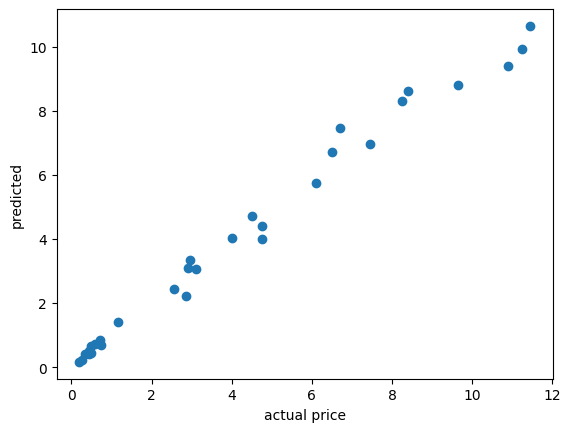

In [63]:
plt.scatter(y_test, y_pred_xg_test)
plt.xlabel("actual price")
plt.ylabel("predicted")